In [1]:
#Importing libraries:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Loading the data
df=pd.read_csv("bank_term_deposit1.csv")

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.shape

(41188, 21)

In [6]:
#To check for null values:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df['target']=df['y']
df['target']=np.where(df['target'].isin(['yes']),1,0)


In [8]:
df['target'].mean()

0.11265417111780131

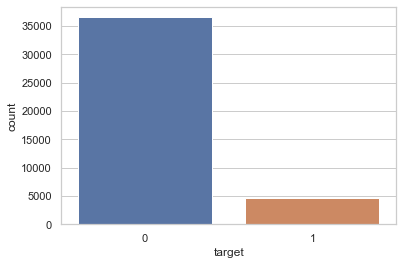

In [9]:
sns.countplot(x='target',data=df)
plt.show()

In [10]:
df.groupby('education')['target'].mean()

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64

In [11]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='illiterate', 'unknown', df['education'])

In [12]:
#df['education'].value_counts()
df.groupby('education')['target'].mean()

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64

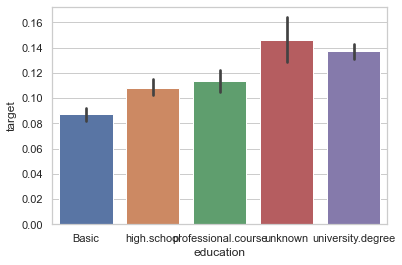

In [13]:
from numpy import mean
ax=sns.barplot(x='education',y='target',data=df,estimator=mean)

In [14]:
#education will be considered as important feature

In [15]:
df.groupby('day_of_week')['target'].value_counts()

day_of_week  target
fri          0         6981
             1          846
mon          0         7667
             1          847
thu          0         7578
             1         1045
tue          0         7137
             1          953
wed          0         7185
             1          949
Name: target, dtype: int64

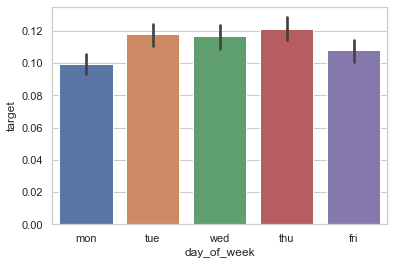

In [16]:
from numpy import mean
ax=sns.barplot(x="day_of_week",y="target",data=df,estimator=mean)

In [17]:
#day_of_week is not a statiscally significant feature

In [18]:
df.groupby('job')['target'].value_counts()

job            target
admin.         0         9070
               1         1352
blue-collar    0         8616
               1          638
entrepreneur   0         1332
               1          124
housemaid      0          954
               1          106
management     0         2596
               1          328
retired        0         1286
               1          434
self-employed  0         1272
               1          149
services       0         3646
               1          323
student        0          600
               1          275
technician     0         6013
               1          730
unemployed     0          870
               1          144
unknown        0          293
               1           37
Name: target, dtype: int64

In [19]:
df['job']=np.where(df['job'] =='unknown', 'unemployed', df['job'])

In [20]:
df.groupby('job')['target'].value_counts()

job            target
admin.         0         9070
               1         1352
blue-collar    0         8616
               1          638
entrepreneur   0         1332
               1          124
housemaid      0          954
               1          106
management     0         2596
               1          328
retired        0         1286
               1          434
self-employed  0         1272
               1          149
services       0         3646
               1          323
student        0          600
               1          275
technician     0         6013
               1          730
unemployed     0         1163
               1          181
Name: target, dtype: int64

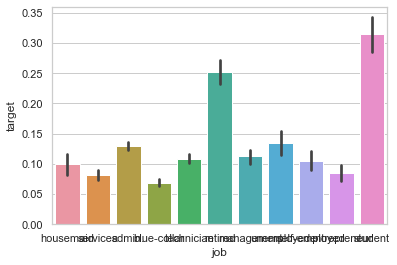

In [21]:
ax=sns.barplot(x='job',y='target',data=df,estimator=mean)

In [22]:
#Job is not a good feature to use as a  predictor

In [23]:
df.groupby('marital')['target'].value_counts()


marital   target
divorced  0          4136
          1           476
married   0         22396
          1          2532
single    0          9948
          1          1620
unknown   0            68
          1            12
Name: target, dtype: int64

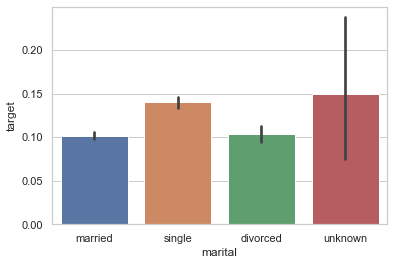

In [24]:
ax=sns.barplot(x='marital',y='target',data=df,estimator=mean)

In [25]:
#Marital will not used as predictor variable

In [26]:
df.groupby('default')['target'].value_counts()

default  target
no       0         28391
         1          4197
unknown  0          8154
         1           443
yes      0             3
Name: target, dtype: int64

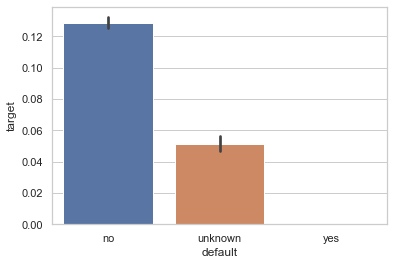

In [27]:
ax=sns.barplot(x='default',y='target',data=df,estimator=mean)

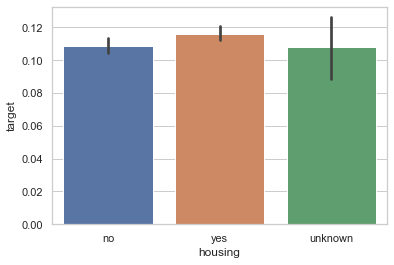

In [28]:
ax=sns.barplot(x='housing',y="target",data=df,estimator=mean)

In [29]:
#Housing is not a good predictor

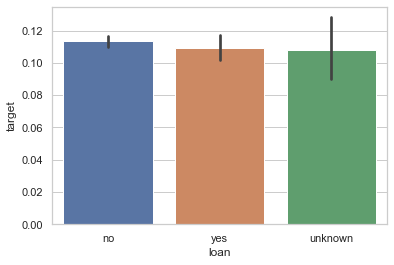

In [30]:
ax=sns.barplot(x="loan",y="target",data=df,estimator=mean)

In [31]:
#Loan is not a good predictor

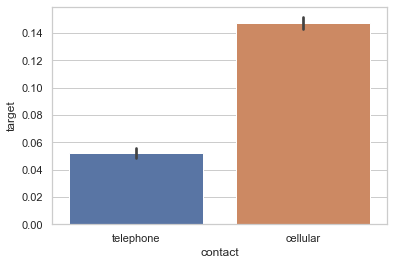

In [32]:
ax=sns.barplot(x="contact",y="target",data=df,estimator=mean)

In [33]:
#contact is a good predictor

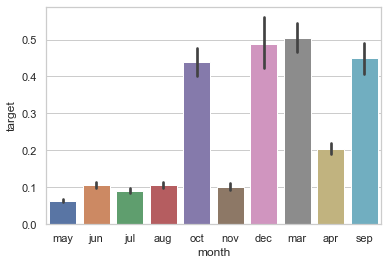

In [34]:
ax=sns.barplot(x="month",y='target',data=df,estimator=mean)

In [35]:
#Lets divide month information in quarters and then analyse the pattern:
df['qtr']=np.where(df['month'].isin(['jan','feb','mar']),'Q1',np.where(df['month'].isin(['apr','may','jun']),'Q2',np.where(df['month'].isin(['jul','aug','sep']),'Q3',np.where(df['month'].isin(['oct','nov','dec']),'Q4',0))))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

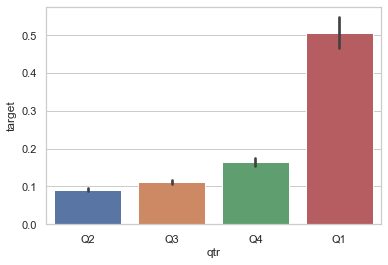

In [36]:
sns.barplot(x="qtr",y="target",data=df,estimator=mean)

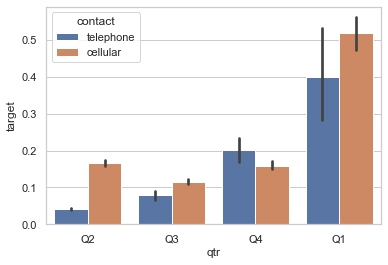

In [37]:
sns.barplot(x="qtr",y="target",hue="contact",data=df,estimator=mean)

In [38]:
#qtr is a good predictor

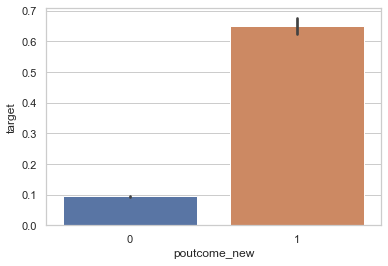

In [60]:
df.groupby('poutcome')['target'].value_counts()
df['poutcome_new']=np.where(df['poutcome'].isin(['failure','nonexistent']),0,1)
ax=sns.barplot(x='poutcome_new',y='target',data=df,estimator=mean)

In [58]:
#To check for outliers:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,poutcome_new
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000


In [40]:
num=df.select_dtypes(include='number')


In [41]:
floor=df.quantile(0.99)
floor

age                 71.000
duration          1271.130
campaign            14.000
pdays              999.000
previous             2.000
emp.var.rate         1.400
cons.price.idx      94.465
cons.conf.idx      -26.900
euribor3m            4.968
nr.employed       5228.100
target               1.000
Name: 0.99, dtype: float64

In [42]:
cap=df.quantile(0.01)
cap

age                 23.00000
duration            11.00000
campaign             1.00000
pdays                3.00000
previous             0.00000
emp.var.rate        -3.40000
cons.price.idx      92.20100
cons.conf.idx      -49.50000
euribor3m            0.65848
nr.employed       4963.60000
target               0.00000
Name: 0.01, dtype: float64

In [43]:
X=df.select_dtypes(include='number')
X.head(5)
X=X.drop(['target'],axis=1)
Y=df['target']

In [44]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [45]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,0.162402,0.081886,93.574052,-40.495137,3.621394,5167.035911
std,10.138262,235.184174,2.301191,186.891194,0.433241,1.570960,0.576030,4.612905,1.734194,72.251528
min,23.000000,11.000000,1.000000,3.000000,0.000000,-3.400000,92.201000,-49.500000,0.658480,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,71.000000,1271.130000,14.000000,999.000000,2.000000,1.400000,94.465000,-26.900000,4.968000,5228.100000


In [51]:
#To study ranks and plots ----using Kbin discretizer
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=5,encode='ordinal', strategy='quantile')
X_binned=pd.DataFrame(discrete.fit_transform(X),index=X.index, columns=X.columns).add_suffix('_Rank')
X_bin_combined=pd.concat([Y,X_binned],axis=1,join='inner')
X_bin_combined.head(5)

/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessin

,target,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,previous_Rank,emp.var.rate_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank,nr.employed_Rank
0,0,4.0,3.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,2.0
1,0,4.0,2.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,2.0
2,0,2.0,3.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,2.0
3,0,2.0,2.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,2.0
4,0,4.0,3.0,0.0,0.0,0.0,3.0,4.0,4.0,2.0,2.0


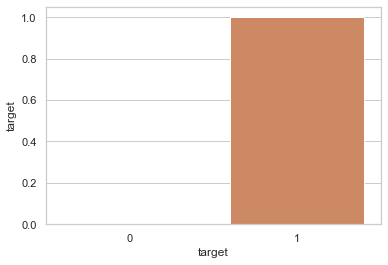

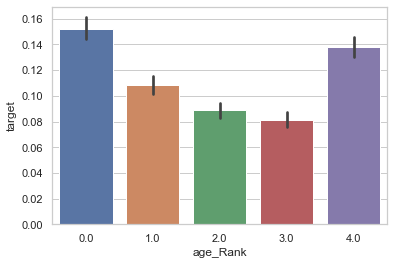

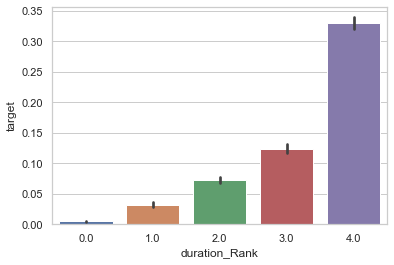

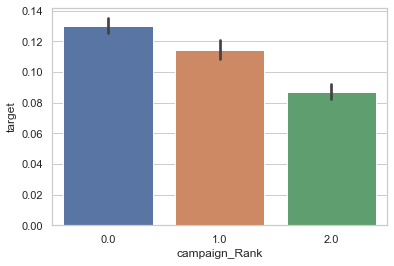

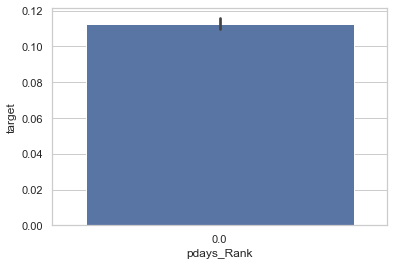

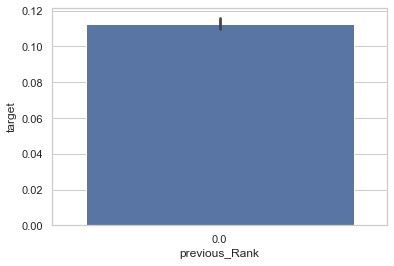

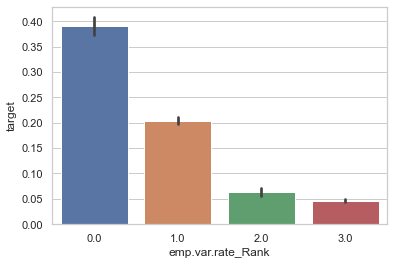

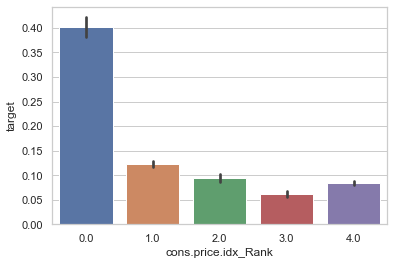

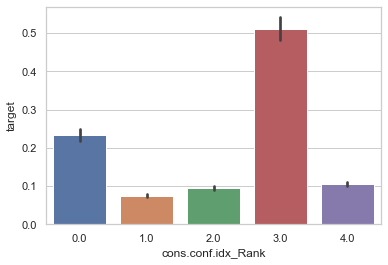

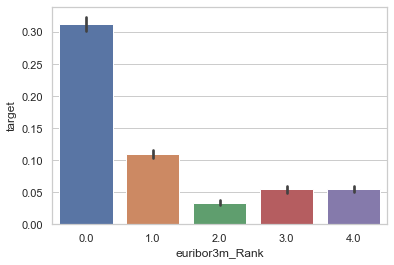

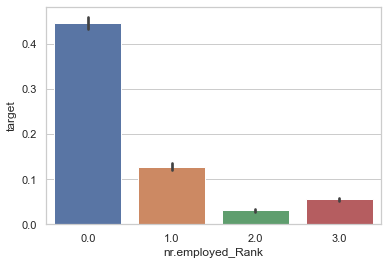

In [52]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

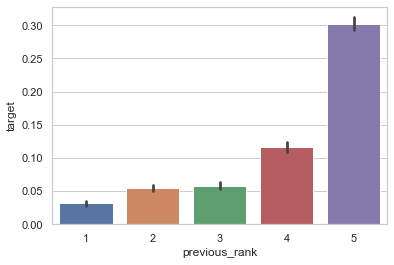

In [61]:
df['previous_rank']=pd.qcut(df['previous'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="previous_rank", y="target", data=df, estimator=mean)

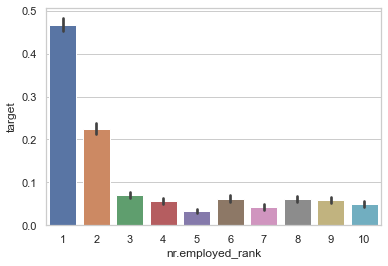

In [63]:
df['nr.employed_rank']=pd.qcut(df['nr.employed'].rank(method='first').values,10,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="nr.employed_rank", y="target", data=df, estimator=mean)

In [64]:
df['employ_rank']=np.where(df['nr.employed_rank'].isin(['3','4','5','6','7','8','9','10']),'C',
                  np.where(df['nr.employed_rank'].isin(['1']),'A',
                  np.where(df['nr.employed_rank'].isin(['2']),'B','X')))

In [65]:
col_num= ['pdays','emp.var.rate','euribor3m','previous','campaign','cons.price.idx','emp.var.rate','poutcome_new']
col_char=['qtr','education','job','contact','employ_rank']

In [66]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [67]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [68]:
X_var=X_all
dep=['target']
Y_var=df[dep]

In [69]:
X_var.head()

,pdays,emp.var.rate,euribor3m,previous,campaign,cons.price.idx,emp.var.rate,poutcome_new,qtr_Q2,qtr_Q3,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_telephone,employ_rank_B,employ_rank_C
0,999,1.1,4.857,0,1,93.994,1.1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,999,1.1,4.857,0,1,93.994,1.1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,999,1.1,4.857,0,1,93.994,1.1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,999,1.1,4.857,0,1,93.994,1.1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,999,1.1,4.857,0,1,93.994,1.1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [71]:
#decision tree implementation:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_split=100,max_depth=6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=100, random_state=100)

In [72]:
X_test.shape

(12357, 28)

In [73]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.90


In [74]:
dtree_score_train = dtree.score(X_train, y_train)
print("Training score: ",dtree_score_train)
dtree_score_test = dtree.score(X_test, y_test)
print("Testing score: ",dtree_score_test)

Training score:  0.9024314106343866
Testing score:  0.8990855385611395


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[10728   241]
 [ 1006   382]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.61      0.28      0.38      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



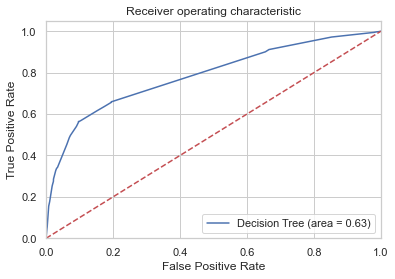

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
y_pred_prob = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['target'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile
0,10,4119,0.496965,2047.0,2047.0,0.441164,0.441164,0.100005,0.100005,1
1,9,4119,0.205875,848.0,2895.0,0.182759,0.623922,0.100005,0.200010,2
2,8,4119,0.084972,350.0,3245.0,0.075431,0.699353,0.100005,0.300015,3
3,7,4118,0.049053,202.0,3447.0,0.043534,0.742888,0.099981,0.399995,4
4,6,4119,0.062879,259.0,3706.0,0.055819,0.798707,0.100005,0.500000,5
5,5,4119,0.059723,246.0,3952.0,0.053017,0.851724,0.100005,0.600005,6
6,4,4118,0.065566,270.0,4222.0,0.058190,0.909914,0.099981,0.699985,7
7,3,4119,0.042486,175.0,4397.0,0.037716,0.947629,0.100005,0.799990,8
8,2,4119,0.035931,148.0,4545.0,0.031897,0.979526,0.100005,0.899995,9
9,1,4119,0.023064,95.0,4640.0,0.020474,1.000000,0.100005,1.000000,10


[Text(185.86323529411766, 201.90857142857143, 'X[27] <= 0.5\ngini = 0.2\nsamples = 28831\nvalue = [25579, 3252]'),
 Text(84.52058823529413, 170.84571428571428, 'X[0] <= 513.0\ngini = 0.453\nsamples = 5803\nvalue = [3788, 2015]'),
 Text(32.82352941176471, 139.78285714285715, 'X[26] <= 0.5\ngini = 0.426\nsamples = 949\nvalue = [292, 657]'),
 Text(19.694117647058825, 108.72, 'X[4] <= 3.5\ngini = 0.397\nsamples = 769\nvalue = [210, 559]'),
 Text(13.129411764705884, 77.65714285714284, 'X[0] <= 2.5\ngini = 0.384\nsamples = 714\nvalue = [185, 529]'),
 Text(6.564705882352942, 46.59428571428572, 'gini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(19.694117647058825, 46.59428571428572, 'X[2] <= 0.717\ngini = 0.375\nsamples = 692\nvalue = [173, 519]'),
 Text(13.129411764705884, 15.531428571428563, 'gini = 0.317\nsamples = 248\nvalue = [49, 199]'),
 Text(26.258823529411767, 15.531428571428563, 'gini = 0.403\nsamples = 444\nvalue = [124, 320]'),
 Text(26.258823529411767, 77.65714285714284, 'gini

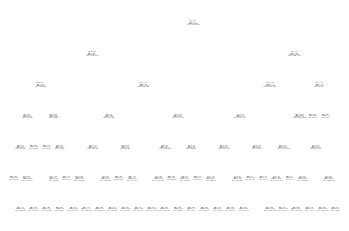

In [79]:
tree.plot_tree(dtree)

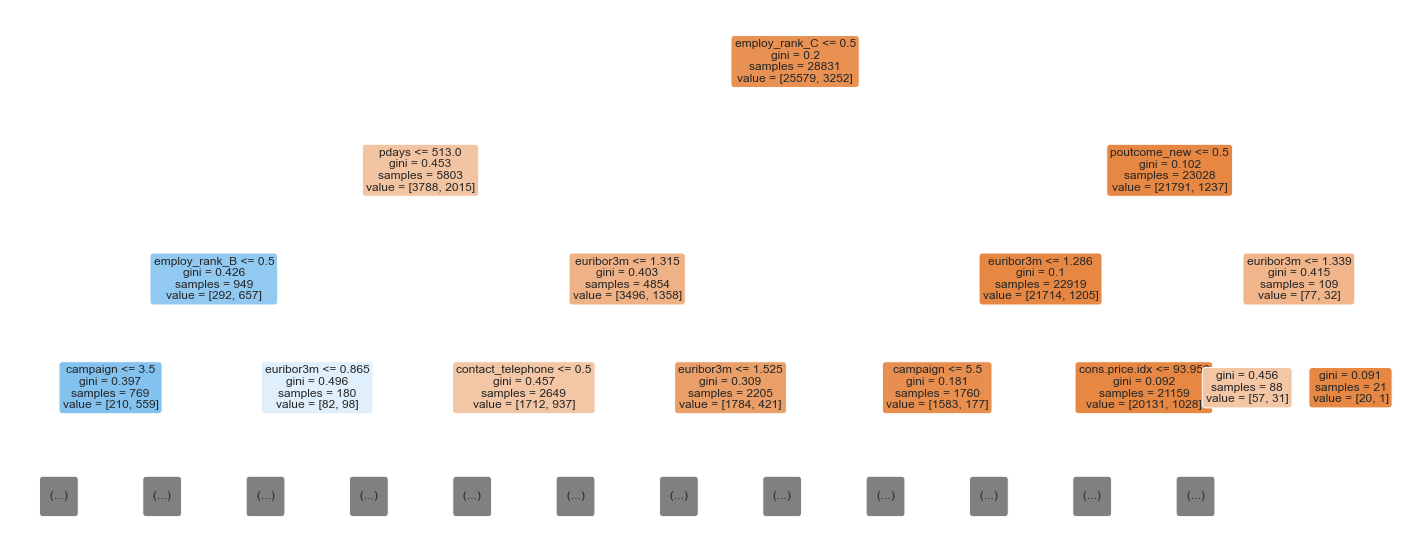

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=[25,10])
tree.plot_tree(dtree,filled=True,fontsize=12,rounded=True,max_depth=3,feature_names=X_train.columns)
plt.show()